# Stock prices prediction using ML.
## Tools used:
### 1. Ridge regression
### 2. LSTM Time series modelling

In [61]:
import pandas as pd

from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [62]:
pip install plotly

In [63]:
import plotly.express as px
import plotly.figure_factory as ff

In [64]:
stock_price_df = pd.read_csv(r"D:\MLR\New folder\stock.csv")
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [65]:
# Read the stocks volume data
stock_vol_df = pd.read_csv(r"D:\MLR\New folder\stock_volume.csv")
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [66]:
# Sorting the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [67]:
# Sorting the data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [68]:
# Checking if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [69]:
# Checking if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [70]:
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [71]:
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [72]:
stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


In [73]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [74]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [75]:
# plotting interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

In [76]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [77]:
# Function to return the input/output (target) data for AI/ML Model

def trading_window(data):
  
  # 1 day window 
  n = 1

  data['Target'] = data[['Close']].shift(-n)
  
  return data

In [78]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [79]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [80]:
# Removing last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [81]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [82]:
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [83]:
price_volume_target_scaled_df.shape

(2158, 3)

In [84]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [85]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((2158, 2), (2158, 1))

In [86]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.75 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [87]:
X_train.shape, y_train.shape

((1618, 2), (1618, 1))

In [88]:
X_test.shape, y_test.shape

((540, 2), (540, 1))

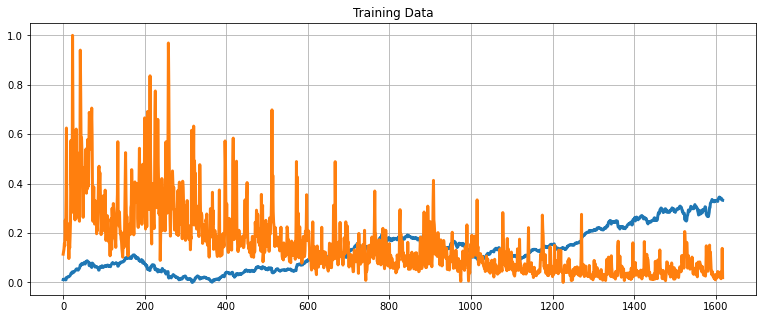

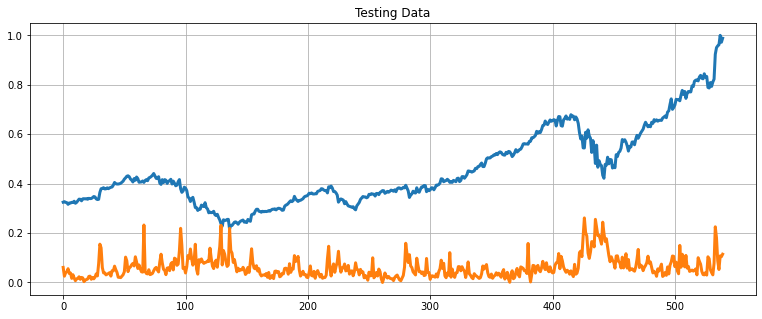

In [89]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


# BUILDING AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [90]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [91]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9311227075637686


In [92]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.02628595],
       [0.02542773],
       [0.02652743],
       ...,
       [0.90335343],
       [0.87872987],
       [0.89266596]])

In [93]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [94]:
len(Predicted)

2158

In [95]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])
close

[0.011026384814221801,
 0.010461850751312146,
 0.012209064567417965,
 0.013784776200681387,
 0.013298840009958124,
 0.010636929543771906,
 0.013177355336995877,
 0.010676229730427894,
 0.020055450755057824,
 0.019330121828027513,
 0.02027698295340838,
 0.02232432934117673,
 0.023564167317859763,
 0.023460550686230847,
 0.02307824113163892,
 0.02470754438327427,
 0.026240369215761894,
 0.027976878214271583,
 0.030781713002119487,
 0.036673647108144525,
 0.03676296980693192,
 0.040043025963404616,
 0.0424941190533388,
 0.0382815032077036,
 0.039903670747983455,
 0.03987151627718541,
 0.04441999577489858,
 0.043773267221180245,
 0.0449702284015899,
 0.04712119642323834,
 0.048318177612652835,
 0.051766154340099235,
 0.054278004773268135,
 0.05500331369129366,
 0.05525701036494465,
 0.05096222754088253,
 0.04992603371221188,
 0.05007968286047457,
 0.054117199904645114,
 0.05525344375982963,
 0.05769381202316293,
 0.06344640842164612,
 0.07112129492756925,
 0.06968492850522459,
 0.069688497

In [96]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [97]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [98]:
# Adding the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.011026,0.026286
1,2012-01-13,0.010462,0.025428
2,2012-01-17,0.012209,0.026527
3,2012-01-18,0.013785,0.027022
4,2012-01-19,0.013299,0.026992
...,...,...,...
2153,2020-08-04,0.957606,0.866550
2154,2020-08-05,0.961583,0.871436
2155,2020-08-06,1.000000,0.903353
2156,2020-08-07,0.972088,0.878730


In [99]:
# Plotting the results
interactive_plot(df_predicted, "Original Vs. Prediction")

## TRAINING AN LSTM TIME SERIES MODEL

In [100]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [101]:
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [102]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [103]:
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [104]:
X

[array([0.00828228]),
 array([0.00524163]),
 array([0.00741423]),
 array([0.01423076]),
 array([0.0172951]),
 array([0.01771253]),
 array([0.01800663]),
 array([0.01736626]),
 array([0.02277871]),
 array([0.01915935]),
 array([0.01816315]),
 array([0.01658831]),
 array([0.0163037]),
 array([0.02184418]),
 array([0.02253203]),
 array([0.03171561]),
 array([0.03144519]),
 array([0.03273549]),
 array([0.03411583]),
 array([0.0350598]),
 array([0.03064355]),
 array([0.03497445]),
 array([0.034372]),
 array([0.03092341]),
 array([0.03794869]),
 array([0.03946186]),
 array([0.03992672]),
 array([0.03776843]),
 array([0.04051967]),
 array([0.04160122]),
 array([0.04247878]),
 array([0.04465612]),
 array([0.04157279]),
 array([0.04556211]),
 array([0.04344649]),
 array([0.04093236]),
 array([0.03098508]),
 array([0.03538239]),
 array([0.04168189]),
 array([0.04403469]),
 array([0.04413903]),
 array([0.05593158]),
 array([0.05513944]),
 array([0.05908607]),
 array([0.05983085]),
 array([0.06247

In [105]:
X = np.asarray(X)
y = np.asarray(y)

In [106]:
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [107]:
# Reshaping 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [5]:
pip install tensorflow

In [2]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\Users\sachin\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [7]:
from tensorflow import keras

ImportError: Traceback (most recent call last):
  File "C:\Users\sachin\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [108]:
# Model building
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

NameError: name 'keras' is not defined

In [ ]:
# Traying the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

In [ ]:
predicted = model.predict(X)

In [ ]:
# Appending the predicted values to a list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0][0])

In [ ]:
test_predicted

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

In [ ]:
close = []
for i in training_set_scaled:
  close.append(i[0])


In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

In [ ]:
# Plotting the data
interactive_plot(df_predicted, "Original Vs Prediction")